# Figure: Emergent Connectivity Structure

## Set up

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
# jupyter black formatter
%load_ext jupyter_black

import subprocess
import os
import sys

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "pirnns"))
print("Working directory: ", os.getcwd())

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

Working directory:  /home/facosta/pirnns/pirnns
Directory added to path:  /home/facosta/pirnns
Directory added to path:  /home/facosta/pirnns/pirnns


## Load trained models

In [3]:
from pirnns.paper_figs.load_models import load_experiment_sweep
import torch


sweep_dir = (
    "/home/facosta/pirnns/pirnns/logs/experiments/timescales_sweep_20250919_130449"
)

device = "cuda" if torch.cuda.is_available() else "cpu"

models, metadata, summary = load_experiment_sweep(
    sweep_dir=sweep_dir,
    device=device,
    use_lightning_checkpoint=True,
    checkpoint_type="best",
)

Loading 8 experiments with 5 seeds each...
Total models to load: 40
Using Lightning checkpoints

Loading experiment: discrete_single_025
  ✓ Loaded discrete_single_025/seed_0
  ✓ Loaded discrete_single_025/seed_1
  ✓ Loaded discrete_single_025/seed_2
  ✓ Loaded discrete_single_025/seed_3
  ✓ Loaded discrete_single_025/seed_4
Loading experiment: discrete_single_05
  ✓ Loaded discrete_single_05/seed_0
  ✓ Loaded discrete_single_05/seed_1
  ✓ Loaded discrete_single_05/seed_2
  ✓ Loaded discrete_single_05/seed_3
  ✓ Loaded discrete_single_05/seed_4
Loading experiment: discrete_single_075
  ✓ Loaded discrete_single_075/seed_0
  ✓ Loaded discrete_single_075/seed_1
  ✓ Loaded discrete_single_075/seed_2
  ✓ Loaded discrete_single_075/seed_3
  ✓ Loaded discrete_single_075/seed_4
Loading experiment: discrete_single_1
  ✓ Loaded discrete_single_1/seed_0
  ✓ Loaded discrete_single_1/seed_1
  ✓ Loaded discrete_single_1/seed_2
  ✓ Loaded discrete_single_1/seed_3
  ✓ Loaded discrete_single_1/seed_4
L

## Show connection weight distributions by group pairs

Found 2 discrete timescale groups:
  Group 0: τ=0.0721, 2017 neurons (49.2%)
  Group 1: τ=0.3476, 2079 neurons (50.8%)


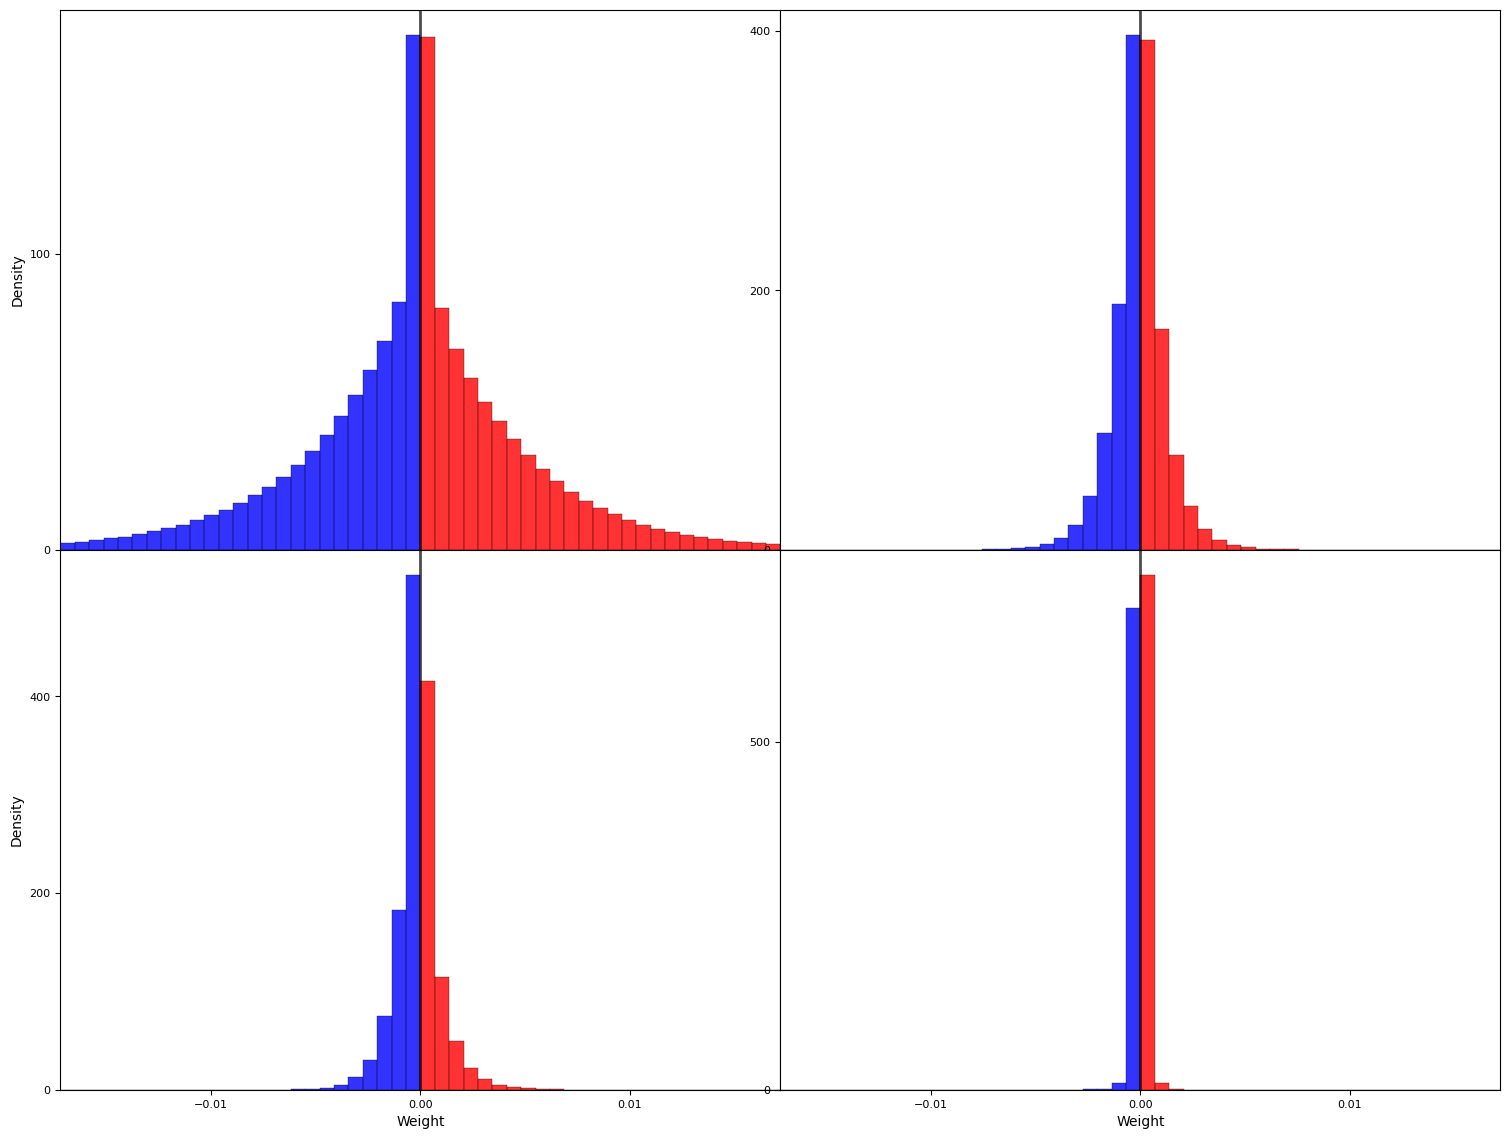

In [58]:
from pirnns.paper_figs.connectivity.connectivity import get_timescale_groups
import matplotlib.pyplot as plt

from pirnns.paper_figs.connectivity.connectivity import (
    plot_group_connectivity_distributions,
)


model_type = "discrete_two"
seed = 0
model = models[model_type][seed]["model"]
W_rec, timescales, unique_timescales, group_assignment = get_timescale_groups(model)

fig, group_weights = plot_group_connectivity_distributions(
    W_rec,
    group_assignment,
    unique_timescales,
    figsize=(16, 12),
    bins=50,
    common_ylim=False,
    paper_ready=True,
    save_fig=True,
    save_fig_name=f"paper_figs/connectivity/weight_distributions_{model_type}_{seed}.pdf",
)
plt.show()

## Show bipartite graph with line thickness = mean absolute weight

Binned 4096 neurons into 10 groups:
Timescale range: [0.0434, 0.8989]
  Group 0: τ_mean=0.0505, range=[0.0434, 0.0588], 736 neurons (18.0%)
  Group 1: τ_mean=0.0684, range=[0.0588, 0.0796], 639 neurons (15.6%)
  Group 2: τ_mean=0.0923, range=[0.0796, 0.1077], 522 neurons (12.7%)
  Group 3: τ_mean=0.1249, range=[0.1077, 0.1459], 497 neurons (12.1%)
  Group 4: τ_mean=0.1709, range=[0.1459, 0.1975], 401 neurons (9.8%)
  Group 5: τ_mean=0.2286, range=[0.1975, 0.2675], 321 neurons (7.8%)
  Group 6: τ_mean=0.3139, range=[0.2675, 0.3621], 317 neurons (7.7%)
  Group 7: τ_mean=0.4211, range=[0.3621, 0.4903], 254 neurons (6.2%)
  Group 8: τ_mean=0.5709, range=[0.4903, 0.6639], 233 neurons (5.7%)
  Group 9: τ_mean=0.7782, range=[0.6639, 0.8989], 176 neurons (4.3%)
Connection magnitude range: [5.2e-05, 5.2e-03]

Connection Summary (by magnitude):
G1 → G1: |W|=5.2e-03 (541696 connections)
G1 → G2: |W|=4.3e-03 (470304 connections)
G2 → G1: |W|=4.2e-03 (470304 connections)
G2 → G2: |W|=3.5e-03 (40832

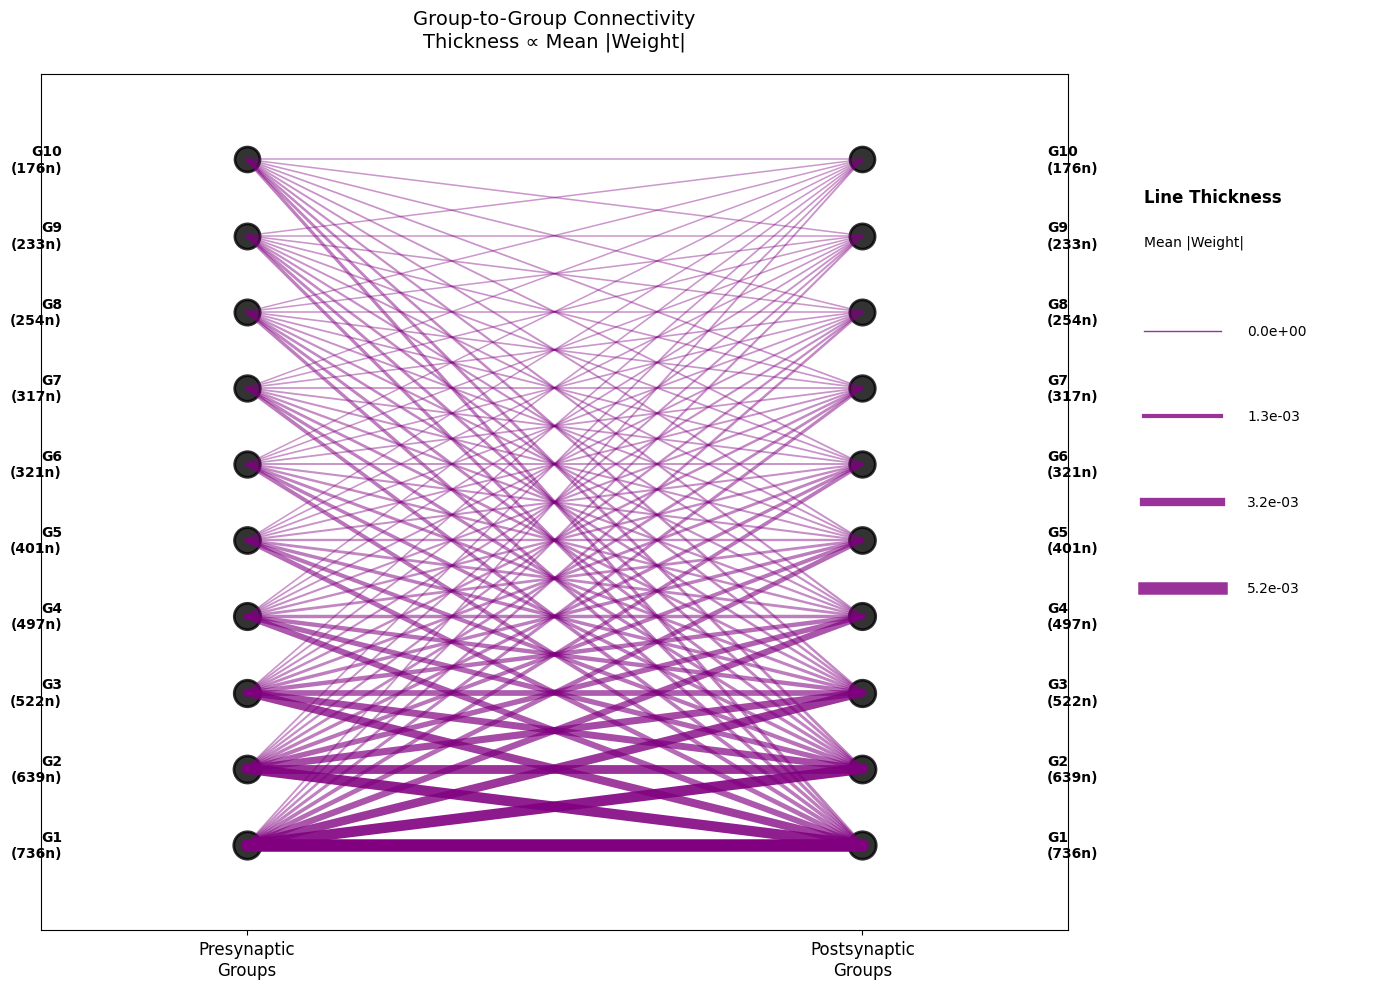

In [89]:
from pirnns.paper_figs.connectivity.connectivity import (
    plot_group_bipartite_with_asymmetry,
)

model_type = "continuous_powerlaw_15"
seed = 0
model = models[model_type][seed]["model"]
W_rec, timescales, unique_timescales, group_assignment = get_timescale_groups(
    model,
    group_method="binned",
    n_groups=10,
)

fig, group_stats, connection_info = plot_group_bipartite_with_asymmetry(
    W_rec,
    group_assignment,
    unique_timescales,
    timescales,
    figsize=(14, 10),
    save_fig=True,
    save_fig_name=f"paper_figs/connectivity/group_bipartite_{model_type}_{seed}.pdf",
)
plt.show()

### Histograms: Self-connection, avg incoming, avg outgoing

Binned 4096 neurons into 10 groups:
Timescale range: [0.0434, 0.8989]
  Group 0: τ_mean=0.0505, range=[0.0434, 0.0588], 736 neurons (18.0%)
  Group 1: τ_mean=0.0684, range=[0.0588, 0.0796], 639 neurons (15.6%)
  Group 2: τ_mean=0.0923, range=[0.0796, 0.1077], 522 neurons (12.7%)
  Group 3: τ_mean=0.1249, range=[0.1077, 0.1459], 497 neurons (12.1%)
  Group 4: τ_mean=0.1709, range=[0.1459, 0.1975], 401 neurons (9.8%)
  Group 5: τ_mean=0.2286, range=[0.1975, 0.2675], 321 neurons (7.8%)
  Group 6: τ_mean=0.3139, range=[0.2675, 0.3621], 317 neurons (7.7%)
  Group 7: τ_mean=0.4211, range=[0.3621, 0.4903], 254 neurons (6.2%)
  Group 8: τ_mean=0.5709, range=[0.4903, 0.6639], 233 neurons (5.7%)
  Group 9: τ_mean=0.7782, range=[0.6639, 0.8989], 176 neurons (4.3%)
Magnitude-based connectivity statistics:

Self-connections |magnitude|:
  Group 0 (τ=0.0505): 0.005174
  Group 1 (τ=0.0684): 0.003464
  Group 2 (τ=0.0923): 0.002015
  Group 3 (τ=0.1249): 0.000957
  Group 4 (τ=0.1709): 0.000447
  Group 5

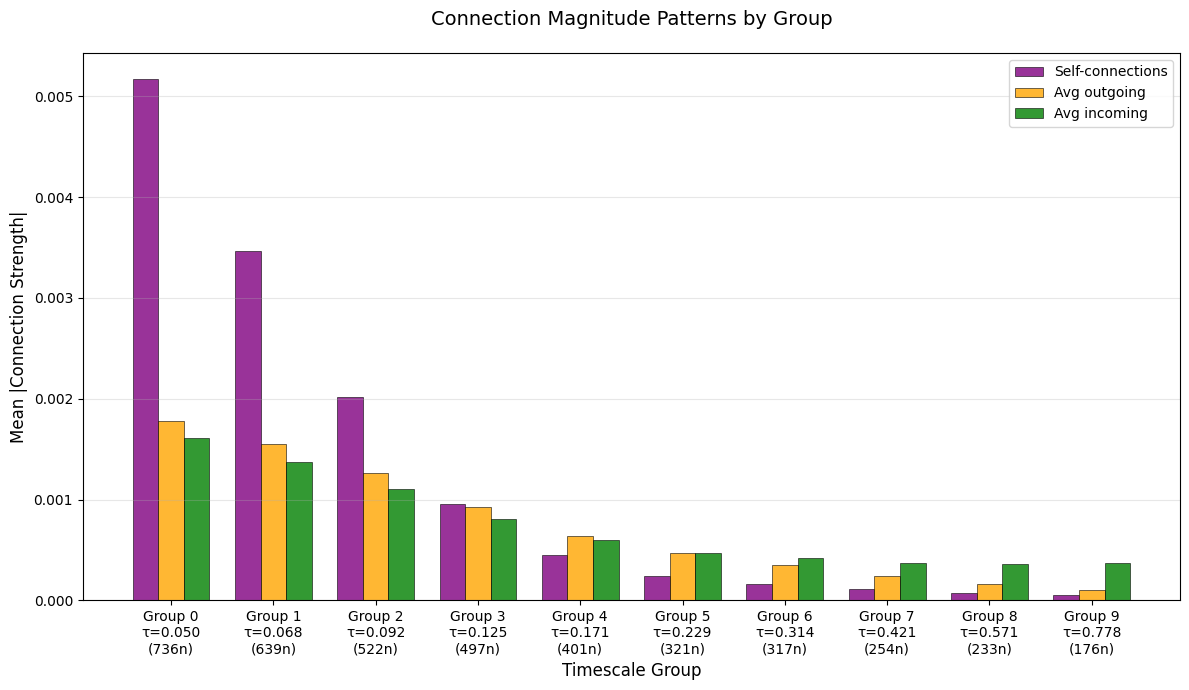

In [84]:
from pirnns.paper_figs.connectivity.connectivity import (
    plot_group_connectivity_magnitude_stats,
)

model_type = "continuous_powerlaw_15"
seed = 0
model = models[model_type][seed]["model"]
W_rec, timescales, unique_timescales, group_assignment = get_timescale_groups(
    model,
    group_method="binned",
    n_groups=10,
)

fig, stats = plot_group_connectivity_magnitude_stats(
    W_rec,
    group_assignment,
    unique_timescales,
    figsize=(12, 7),
    save_fig=True,
    save_fig_name=f"paper_figs/connectivity/histograms_{model_type}_{seed}.pdf",
)
plt.show()